In [4]:
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

In [5]:
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

Unknown System


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np

In [8]:
import pandas as pd
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2021_10_27_gradientboosting/train.csv")

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
train.Age = train.Age.fillna(train.Age.mean())


In [17]:
train.Embarked = train.Embarked.fillna('S')


In [18]:
train['Sex_n'] = train.Sex.map({'male':1, 'female':2})

In [21]:
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Sex_n        891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Sex_n            0
dtype: int64

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_n
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [24]:
train['Embarked_n'] = train['Embarked'].map({'S':1, 'C':2, 'Q':3})
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Sex_n        891 non-null    int64  
 13  Embarked_n   891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_n,Embarked_n
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


In [36]:
sel = ['Pclass', 'Age', 'Sex_n', 'Embarked_n']
X = train[sel]
y = train['Survived']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [38]:
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [39]:
print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.867
테스트 세트 정확도: 0.821


In [56]:
from sklearn.metrics import confusion_matrix
gbrt = GradientBoostingClassifier(n_estimators = 100, random_state = 0, max_depth = 1, learning_rate = 0.1)
pred = gbrt.fit(X_train, y_train).predict(X_test)
confusion_matrix(y_test, pred)


array([[115,  24],
       [ 25,  59]])

In [53]:
n_estimators = [100, 1000]
for k in n_estimators:
  for i in range(1, 5):
    print()
    print("max_depth =", i)
    print("n_estomators =", k)
    for j in range(1, 10):
      gbrt = GradientBoostingClassifier(n_estimators = k, random_state = 0, max_depth = i, learning_rate = 0.1 * j)
      pred = gbrt.fit(X_train, y_train).predict(X_test)
      confusion_matrix(y_test, pred)

      print("learning_rate = ",0.1 * j)
      print("정확도")
      print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
      print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))



max_depth = 1
n_estomators = 100
learning_rate =  0.1
훈련 세트 정확도: 0.801
테스트 세트 정확도: 0.780
learning_rate =  0.2
훈련 세트 정확도: 0.811
테스트 세트 정확도: 0.794
learning_rate =  0.30000000000000004
훈련 세트 정확도: 0.810
테스트 세트 정확도: 0.798
learning_rate =  0.4
훈련 세트 정확도: 0.810
테스트 세트 정확도: 0.798
learning_rate =  0.5
훈련 세트 정확도: 0.810
테스트 세트 정확도: 0.789
learning_rate =  0.6000000000000001
훈련 세트 정확도: 0.825
테스트 세트 정확도: 0.785
learning_rate =  0.7000000000000001
훈련 세트 정확도: 0.828
테스트 세트 정확도: 0.789
learning_rate =  0.8
훈련 세트 정확도: 0.828
테스트 세트 정확도: 0.785
learning_rate =  0.9
훈련 세트 정확도: 0.831
테스트 세트 정확도: 0.794

max_depth = 2
n_estomators = 100
learning_rate =  0.1
훈련 세트 정확도: 0.838
테스트 세트 정확도: 0.839
learning_rate =  0.2
훈련 세트 정확도: 0.849
테스트 세트 정확도: 0.834
learning_rate =  0.30000000000000004
훈련 세트 정확도: 0.864
테스트 세트 정확도: 0.821
learning_rate =  0.4
훈련 세트 정확도: 0.864
테스트 세트 정확도: 0.816
learning_rate =  0.5
훈련 세트 정확도: 0.867
테스트 세트 정확도: 0.825
learning_rate =  0.6000000000000001
훈련 세트 정확도: 0.867
테스트 세트 정확도: 0.816
learning_rate =

In [46]:
for i in range(1, 10):
  gbrt = GradientBoostingClassifier(n_estimators = 1000, random_state = 0, max_depth = 1, learning_rate = 0.1 * i)
  gbrt.fit(X_train, y_train)
  print("max_depth = 1", "learning_rate = ",0.1 * i)
  print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
  print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

max_depth = 1 learning_rate =  0.1
훈련 세트 정확도: 0.826
테스트 세트 정확도: 0.780
max_depth = 1 learning_rate =  0.2
훈련 세트 정확도: 0.834
테스트 세트 정확도: 0.798
max_depth = 1 learning_rate =  0.30000000000000004
훈련 세트 정확도: 0.838
테스트 세트 정확도: 0.803
max_depth = 1 learning_rate =  0.4
훈련 세트 정확도: 0.837
테스트 세트 정확도: 0.798
max_depth = 1 learning_rate =  0.5
훈련 세트 정확도: 0.841
테스트 세트 정확도: 0.798
max_depth = 1 learning_rate =  0.6000000000000001
훈련 세트 정확도: 0.843
테스트 세트 정확도: 0.789
max_depth = 1 learning_rate =  0.7000000000000001
훈련 세트 정확도: 0.840
테스트 세트 정확도: 0.785
max_depth = 1 learning_rate =  0.8
훈련 세트 정확도: 0.841
테스트 세트 정확도: 0.785
max_depth = 1 learning_rate =  0.9
훈련 세트 정확도: 0.840
테스트 세트 정확도: 0.794


In [43]:
for i in range(1, 10):
  gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 2, learning_rate = 0.1 * i)
  gbrt.fit(X_train, y_train)
  print("max_depth = 2", "learning_rate = ",0.1 * i)
  print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
  print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

max_depth = 2 learning_rate =  0.1
훈련 세트 정확도: 0.838
테스트 세트 정확도: 0.839
max_depth = 2 learning_rate =  0.2
훈련 세트 정확도: 0.849
테스트 세트 정확도: 0.834
max_depth = 2 learning_rate =  0.30000000000000004
훈련 세트 정확도: 0.864
테스트 세트 정확도: 0.821
max_depth = 2 learning_rate =  0.4
훈련 세트 정확도: 0.864
테스트 세트 정확도: 0.816
max_depth = 2 learning_rate =  0.5
훈련 세트 정확도: 0.867
테스트 세트 정확도: 0.825
max_depth = 2 learning_rate =  0.6000000000000001
훈련 세트 정확도: 0.867
테스트 세트 정확도: 0.816
max_depth = 2 learning_rate =  0.7000000000000001
훈련 세트 정확도: 0.873
테스트 세트 정확도: 0.798
max_depth = 2 learning_rate =  0.8
훈련 세트 정확도: 0.873
테스트 세트 정확도: 0.798
max_depth = 2 learning_rate =  0.9
훈련 세트 정확도: 0.874
테스트 세트 정확도: 0.789


In [44]:
for i in range(1, 10):
  gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 3, learning_rate = 0.1 * i)
  gbrt.fit(X_train, y_train)
  print("max_depth = 3", "learning_rate = ",0.1 * i)
  print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
  print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

max_depth = 3 learning_rate =  0.1
훈련 세트 정확도: 0.867
테스트 세트 정확도: 0.821
max_depth = 3 learning_rate =  0.2
훈련 세트 정확도: 0.877
테스트 세트 정확도: 0.803
max_depth = 3 learning_rate =  0.30000000000000004
훈련 세트 정확도: 0.891
테스트 세트 정확도: 0.798
max_depth = 3 learning_rate =  0.4
훈련 세트 정확도: 0.898
테스트 세트 정확도: 0.807
max_depth = 3 learning_rate =  0.5
훈련 세트 정확도: 0.901
테스트 세트 정확도: 0.776
max_depth = 3 learning_rate =  0.6000000000000001
훈련 세트 정확도: 0.903
테스트 세트 정확도: 0.794
max_depth = 3 learning_rate =  0.7000000000000001
훈련 세트 정확도: 0.909
테스트 세트 정확도: 0.767
max_depth = 3 learning_rate =  0.8
훈련 세트 정확도: 0.910
테스트 세트 정확도: 0.776
max_depth = 3 learning_rate =  0.9
훈련 세트 정확도: 0.910
테스트 세트 정확도: 0.780


In [45]:
for i in range(1, 10):
  gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 4, learning_rate = 0.1 * i)
  gbrt.fit(X_train, y_train)
  print("max_depth = 4", "learning_rate = ",0.1 * i)
  print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
  print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

max_depth = 4 learning_rate =  0.1
훈련 세트 정확도: 0.888
테스트 세트 정확도: 0.789
max_depth = 4 learning_rate =  0.2
훈련 세트 정확도: 0.904
테스트 세트 정확도: 0.785
max_depth = 4 learning_rate =  0.30000000000000004
훈련 세트 정확도: 0.909
테스트 세트 정확도: 0.785
max_depth = 4 learning_rate =  0.4
훈련 세트 정확도: 0.910
테스트 세트 정확도: 0.771
max_depth = 4 learning_rate =  0.5
훈련 세트 정확도: 0.910
테스트 세트 정확도: 0.762
max_depth = 4 learning_rate =  0.6000000000000001
훈련 세트 정확도: 0.910
테스트 세트 정확도: 0.771
max_depth = 4 learning_rate =  0.7000000000000001
훈련 세트 정확도: 0.910
테스트 세트 정확도: 0.789
max_depth = 4 learning_rate =  0.8
훈련 세트 정확도: 0.910
테스트 세트 정확도: 0.780
max_depth = 4 learning_rate =  0.9
훈련 세트 정확도: 0.910
테스트 세트 정확도: 0.771


In [31]:
# model : 모델
# n_features : feature(변수의 개수)
# feature_names : 특성의 이름
def plot_feature_important_up(model, n_features, feature_names):
  imp = model.feature_importances_     # feature의 중요도 
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)      

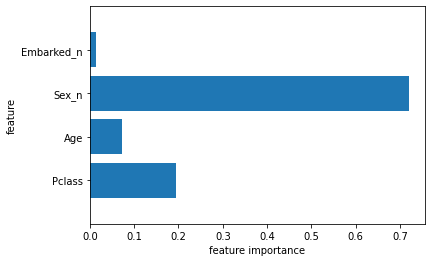

In [33]:
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1, learning_rate=  0.1)

gbrt.fit(X_train, y_train)

feature_num = X_train.shape[1]
feature_names = sel

plot_feature_important_up(gbrt, feature_num, feature_names)

In [26]:
# n_features : 변수의 개수
# feature_names : 변수의 이름 
# model : 모델 
def plot_feature_important_up(model, n_features, feature_names):
  imp = model.feature_importances_     # feature의 중요도 
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)           # y축의 범위 지정 

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
